# World Happiness Report Project

Project Description

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.

The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
whr_df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')

In [3]:
whr_df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


So we have 158 rows and 12 columns from which happiness score will be our tagrent variable and others are independent variables

In [4]:
whr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

so from above we can see that there are no null values present in our data but we have 2 object datatype columns

In [5]:
whr_df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


From above details we notice that-
1) There is very less skewness is some of the columns as the mean and the median are almost same in each columns
2) There may be some outliers present  in some oth the columns as there is a huge difference between 75% and the maximum value
3) We can also note down the Mean and Standard Deviation for each column

### Correlation 

In [6]:
whr_df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


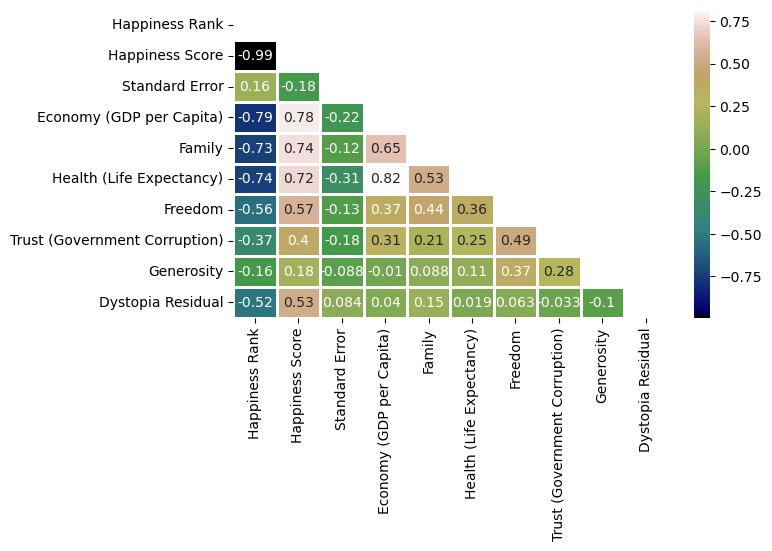

In [7]:
pt.figure(figsize=(7,4))
sb.heatmap(whr_df.corr(),annot=True,cmap='gist_earth',linewidth=1,mask=np.triu(whr_df.corr()))
pt.show()

Thus we see that happiness score is highly correlated with Economy, Family and health.

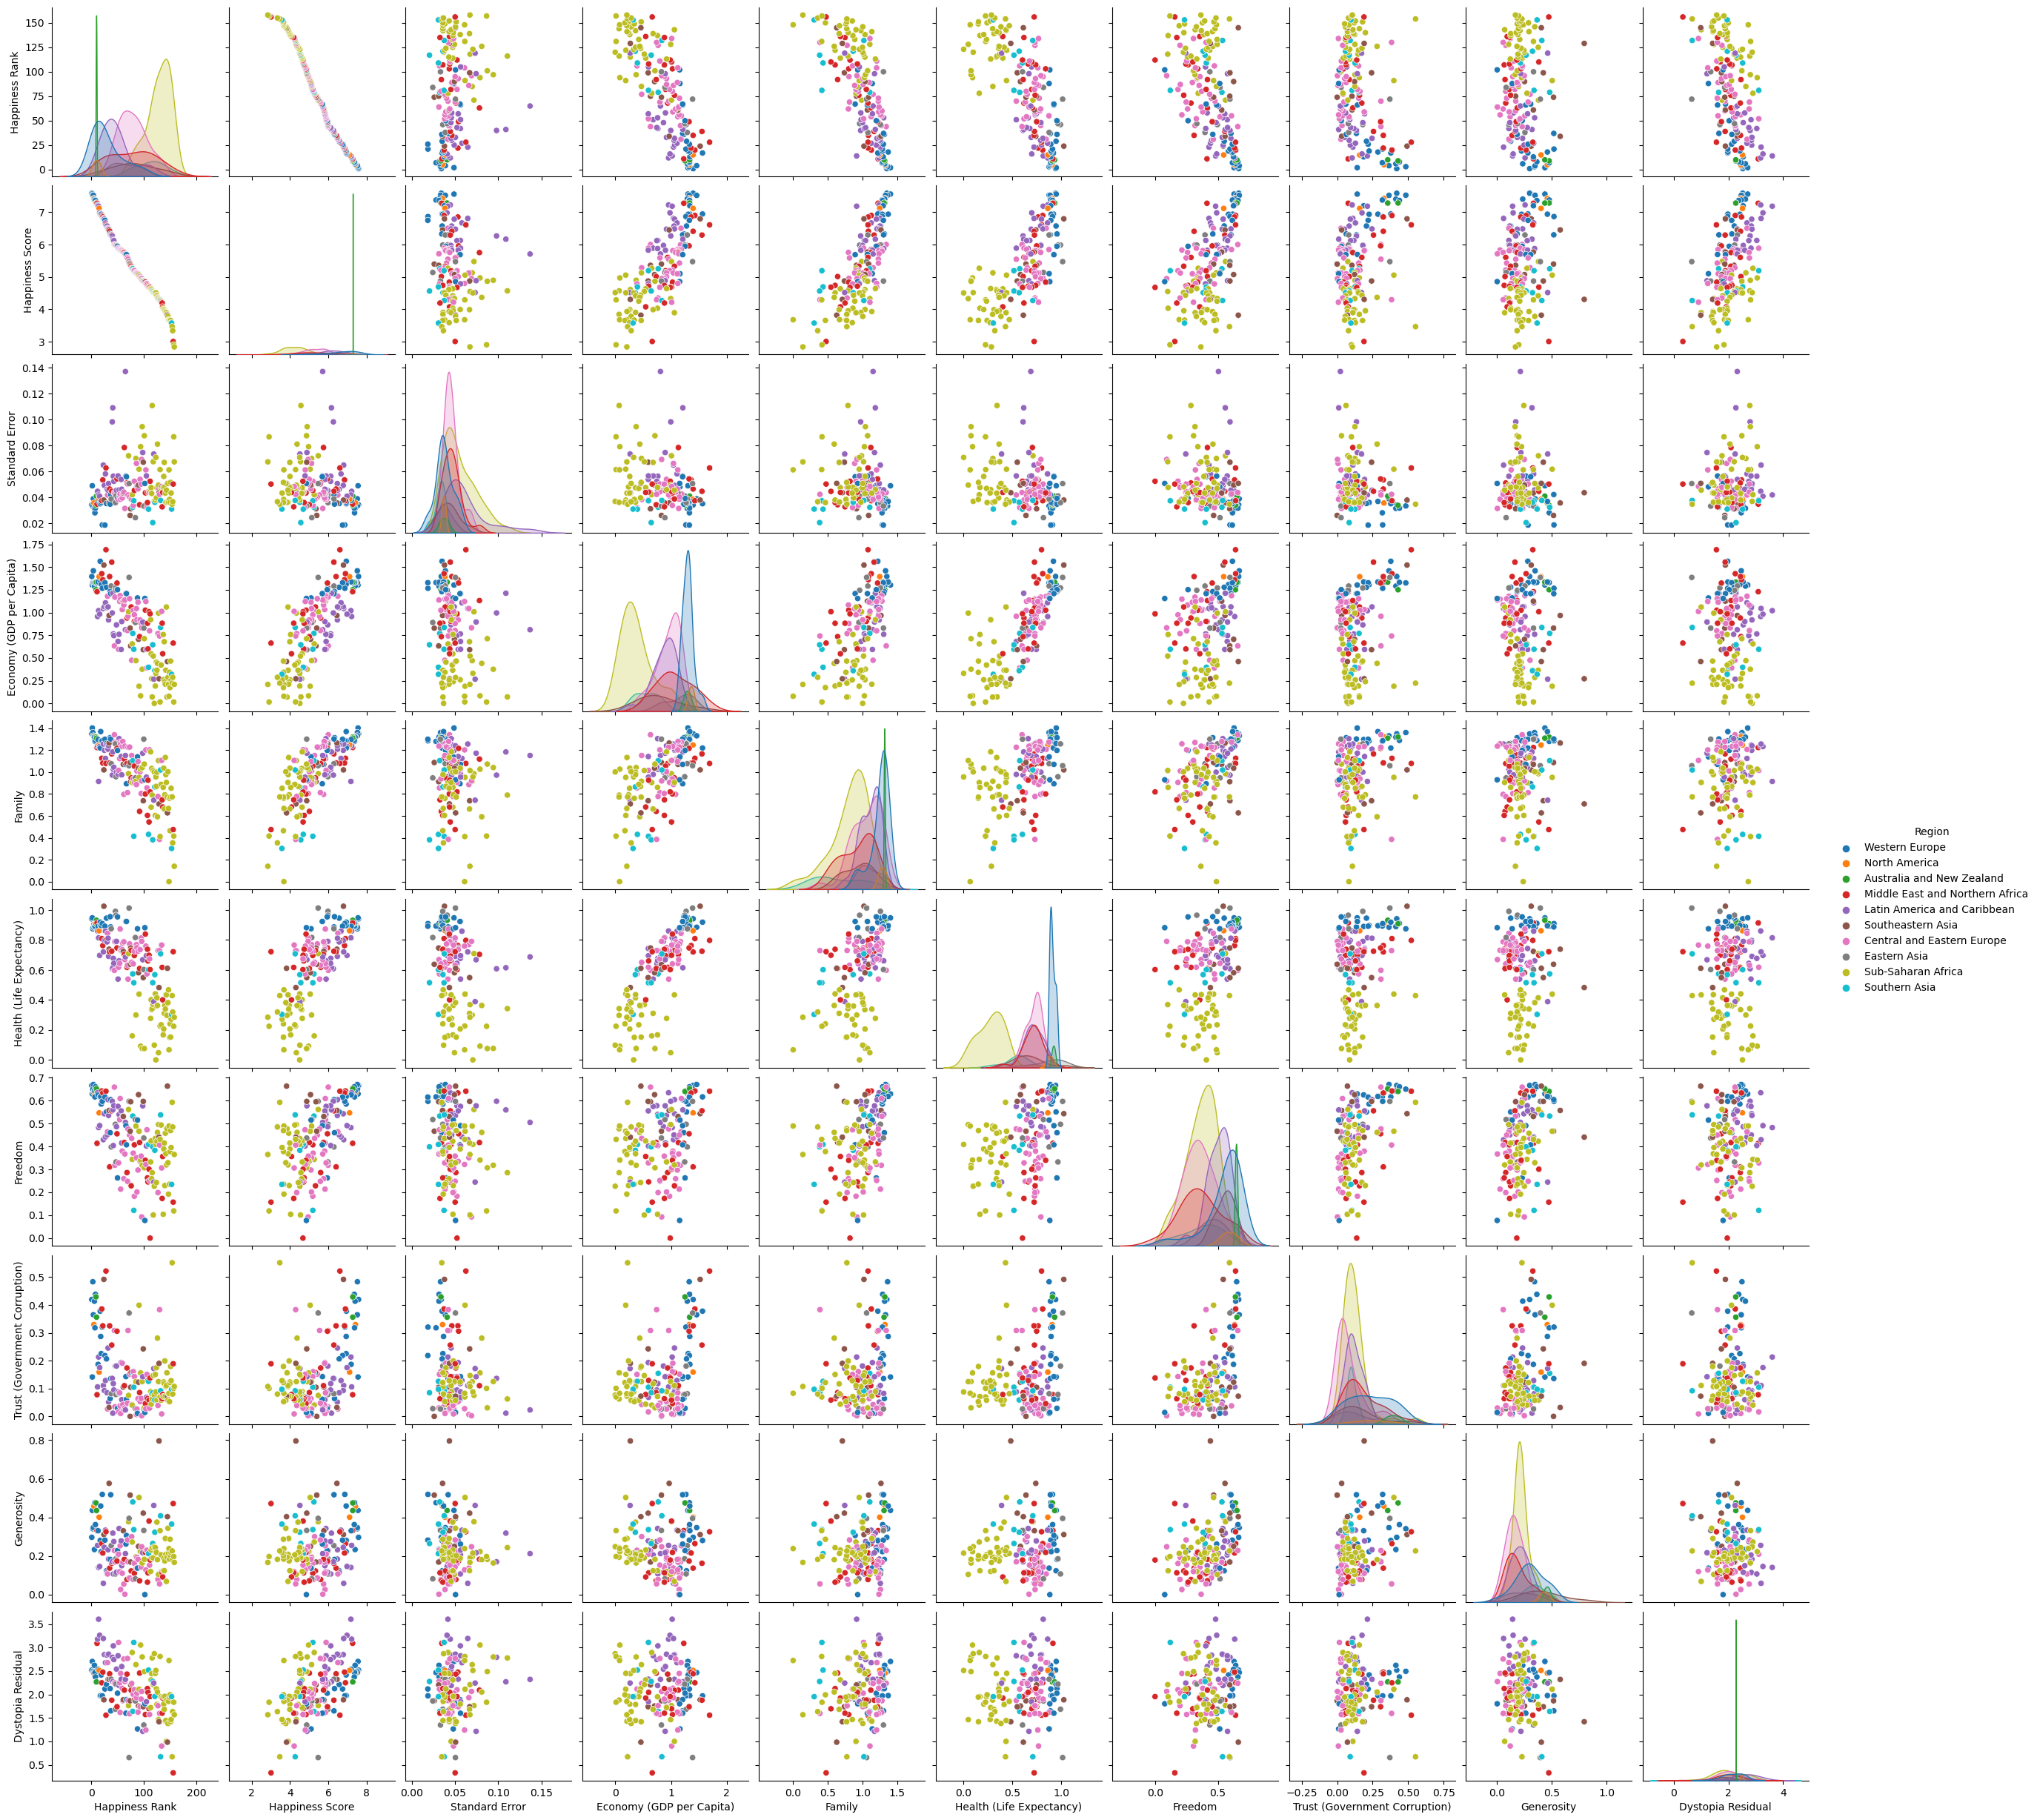

In [8]:
sb.pairplot(whr_df,hue='Region')

### Dropping irrelevant columns 

As country name and happiness rank is unique for every column it wont be ueful for predicting the happiness score so we will drop them

In [9]:
df_new=whr_df.drop(['Country','Happiness Rank'],axis=1)
df_new

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,Sub-Saharan Africa,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Middle East and Northern Africa,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Sub-Saharan Africa,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


###  Now using bivariate analysis

<Axes: xlabel='Happiness Score', ylabel='Region'>

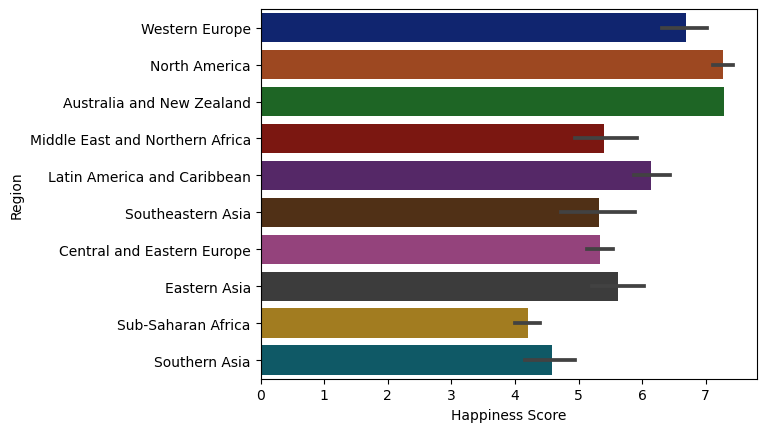

In [10]:
sb.barplot(x='Happiness Score',y='Region',data=df_new, palette='dark')

We see that among different regions North America and Australia regions are the most happiest 

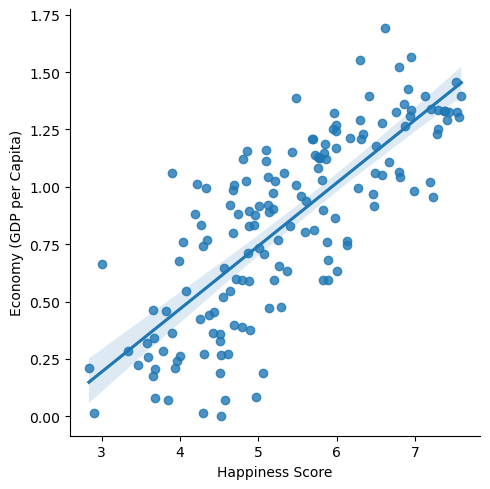

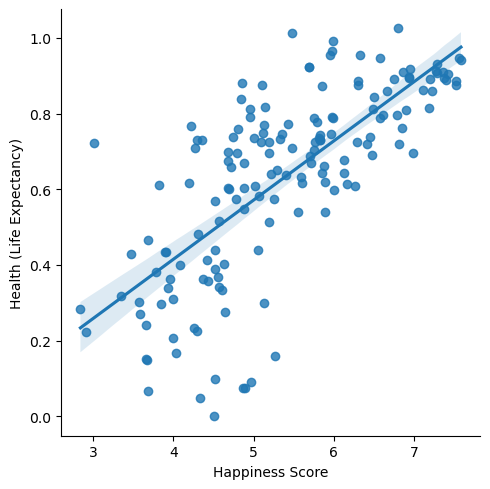

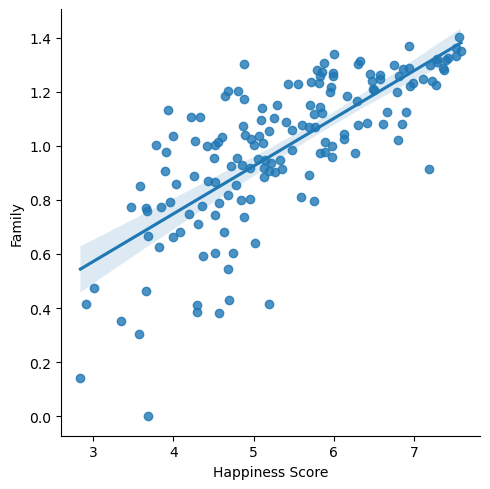

In [11]:
sb.lmplot(x='Happiness Score',y='Economy (GDP per Capita)',data=df_new)
sb.lmplot(x='Happiness Score',y='Health (Life Expectancy)',data=df_new)
sb.lmplot(x='Happiness Score',y='Family',data=df_new)

Proving the positive relation of each Family, Economy and Health with the Happiness Score

### now checking for skewness

First encoding the Region column  

In [12]:
from sklearn.preprocessing import OrdinalEncoder
oe= OrdinalEncoder()

In [13]:
for o in df_new.columns:
    if df_new[o].dtypes=="object":
        df_new[o]=oe.fit_transform(df_new[o].values.reshape(-1,1))

In [14]:
df_new.skew()

Region                          -0.116119
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

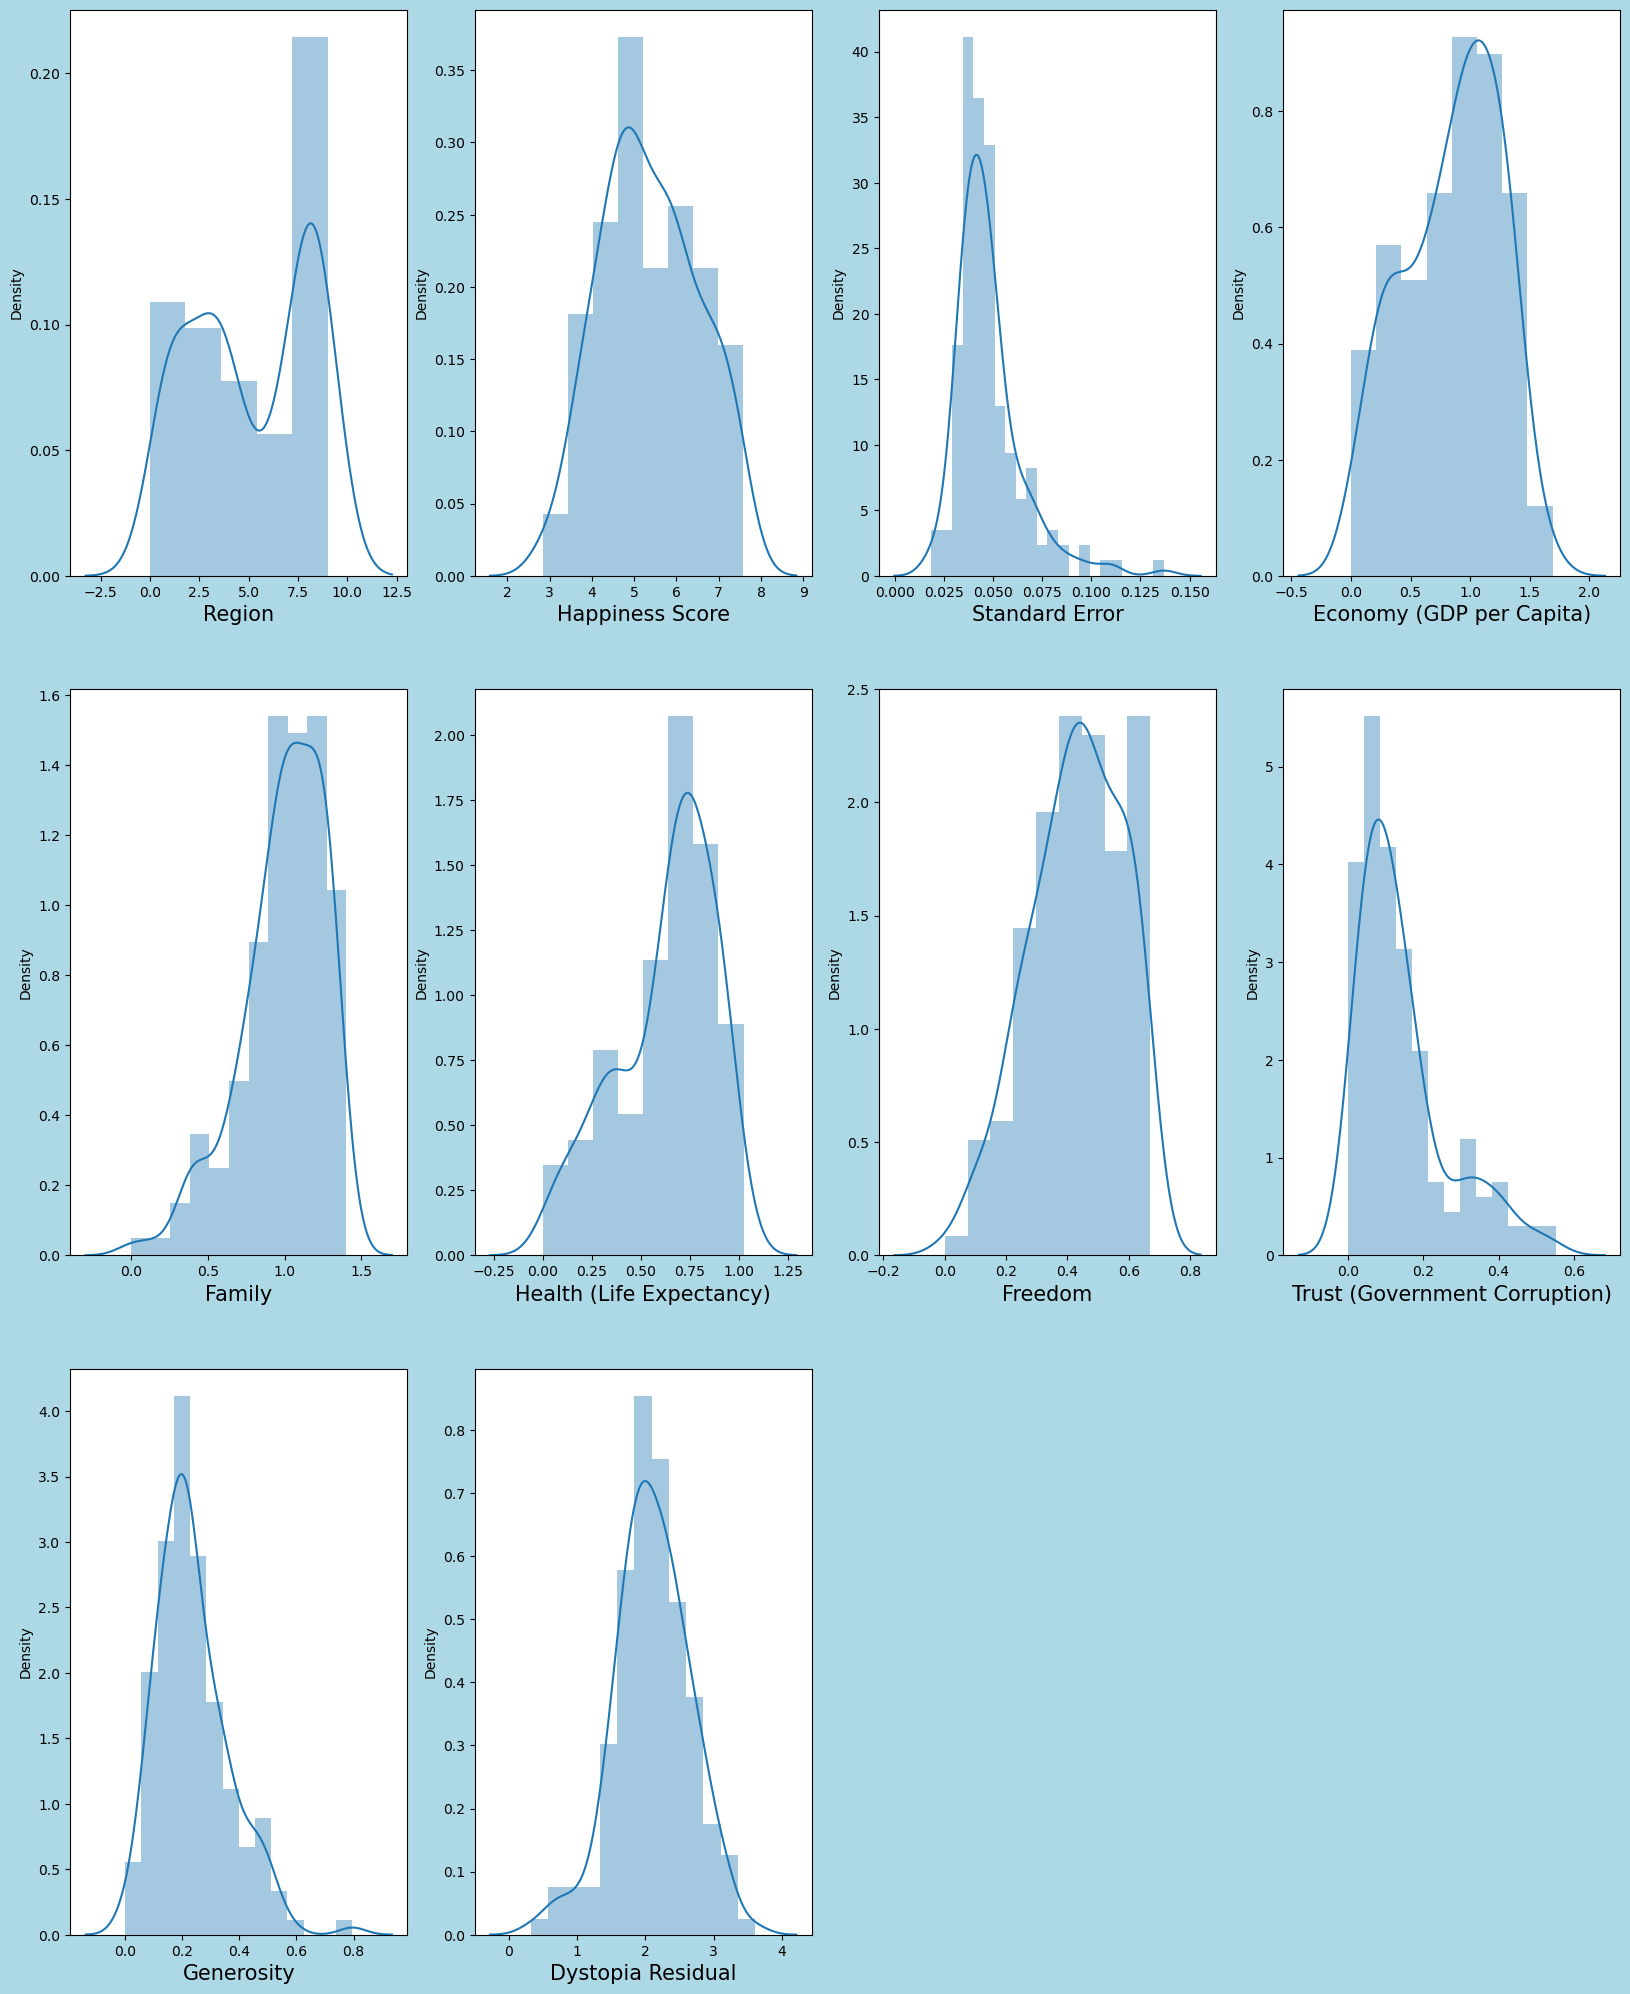

In [15]:
pt.figure(figsize=(20,25),facecolor='lightblue')
ptno=1

for c in df_new:
    if ptno<=11:
        ax=pt.subplot(3,4,ptno)
        sb.distplot(df_new[c])
        pt.xlabel(c,fontsize=15)
        
    ptno+=1

There is a little skewness in trust so we will remove skewness using cuberoot method

In [16]:
df_new['Trust (Government Corruption)']=np.cbrt(df_new['Trust (Government Corruption)'])

In [17]:
df_new.skew()

Region                          -0.116119
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    0.011932
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Skewness is removed now

### Now we will check for outliers

Region                              Axes(0.125,0.53;0.133621x0.35)
Happiness Score                  Axes(0.285345,0.53;0.133621x0.35)
Standard Error                    Axes(0.44569,0.53;0.133621x0.35)
Economy (GDP per Capita)         Axes(0.606034,0.53;0.133621x0.35)
Family                           Axes(0.766379,0.53;0.133621x0.35)
Health (Life Expectancy)            Axes(0.125,0.11;0.133621x0.35)
Freedom                          Axes(0.285345,0.11;0.133621x0.35)
Trust (Government Corruption)     Axes(0.44569,0.11;0.133621x0.35)
Generosity                       Axes(0.606034,0.11;0.133621x0.35)
Dystopia Residual                Axes(0.766379,0.11;0.133621x0.35)
dtype: object

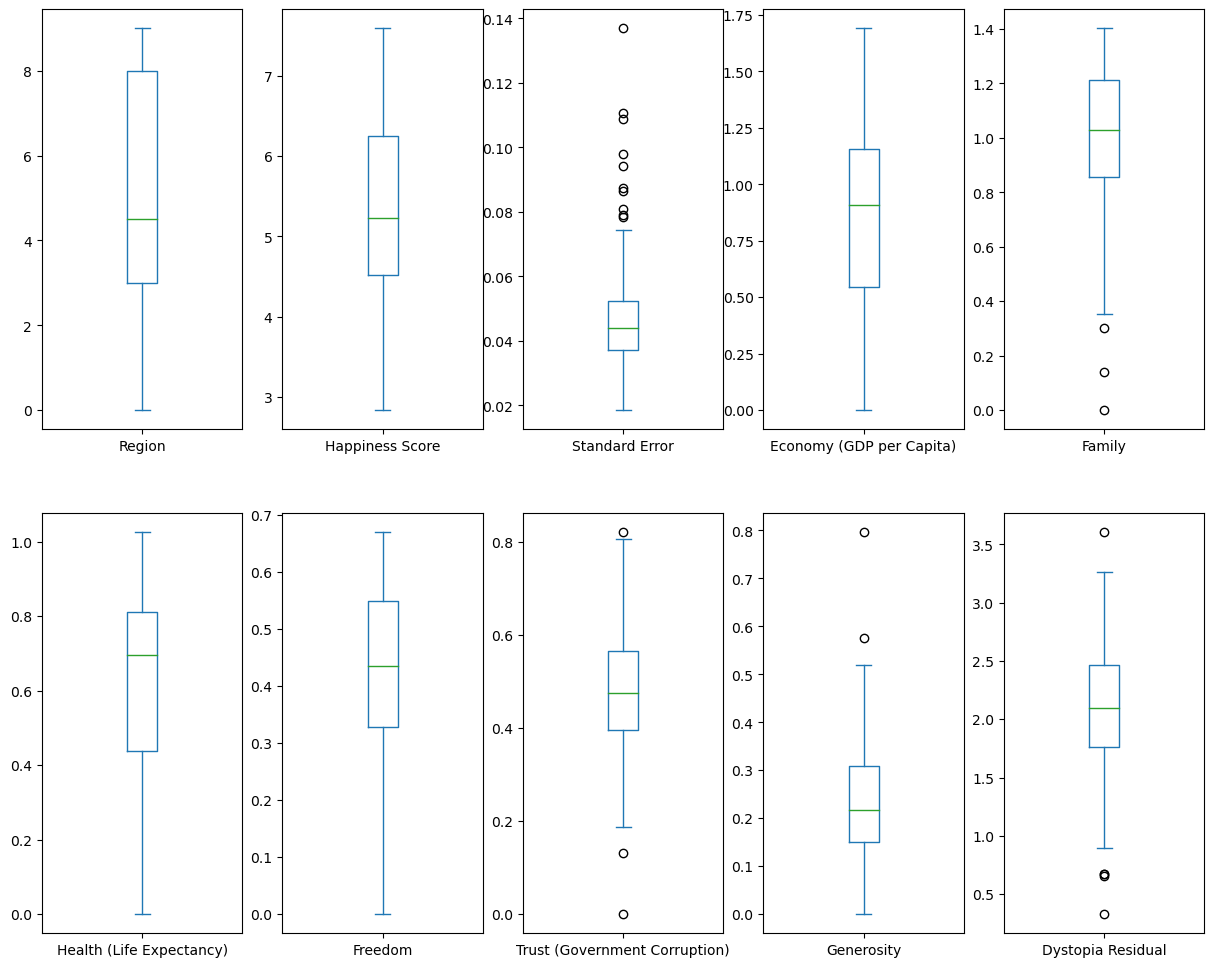

In [18]:
df_new.plot(kind='box',subplots=True,figsize=(15,12),layout=(2,5))

We can see that some of the columns have outliers present so we will now remove the outliers

In [19]:
from scipy.stats import zscore

In [20]:
z=np.abs(zscore(df_new))
threshold=3
np.where(z>3)

df_new1=df_new[(z<3).all(axis=1)]
df_new1 

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.748756,0.29678,2.51738
1,9.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.521036,0.43630,2.70201
2,9.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.784910,0.34139,2.49204
3,9.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.714677,0.34699,2.46531
4,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.690742,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
151,8.0,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.504388,0.21747,1.46494
152,7.0,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.459770,0.36510,1.95210
153,8.0,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.820269,0.22628,0.67042
154,8.0,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.431066,0.18260,1.63328


Data loss= (158-150/158)*100= 5.34

As the data loss is less than 10%, it is acceptable.

Now we will split the data and scale the values

In [46]:
x=df_new1.drop(['Happiness Score'],axis=1)
y=df_new1['Happiness Score']

In [47]:
x

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9.0,0.03411,1.39651,1.34951,0.94143,0.66557,0.748756,0.29678,2.51738
1,9.0,0.04884,1.30232,1.40223,0.94784,0.62877,0.521036,0.43630,2.70201
2,9.0,0.03328,1.32548,1.36058,0.87464,0.64938,0.784910,0.34139,2.49204
3,9.0,0.03880,1.45900,1.33095,0.88521,0.66973,0.714677,0.34699,2.46531
4,5.0,0.03553,1.32629,1.32261,0.90563,0.63297,0.690742,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
151,8.0,0.04324,0.25812,0.85188,0.27125,0.39493,0.504388,0.21747,1.46494
152,7.0,0.03084,0.31982,0.30285,0.30335,0.23414,0.459770,0.36510,1.95210
153,8.0,0.03464,0.22208,0.77370,0.42864,0.59201,0.820269,0.22628,0.67042
154,8.0,0.03656,0.28665,0.35386,0.31910,0.48450,0.431066,0.18260,1.63328


In [48]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
151    3.587
152    3.575
153    3.465
154    3.340
156    2.905
Name: Happiness Score, Length: 150, dtype: float64

### Standardizing

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x = sc.fit_transform(x)
x1=scaled_x
x1

array([[ 1.29494781, -0.88185807,  1.34994787, ...,  1.84560111,
         0.56873735,  0.7604416 ],
       [ 1.29494781,  0.17438104,  1.11132972, ...,  0.22712663,
         1.76055812,  1.10436146],
       [ 1.29494781, -0.94137459,  1.17000258, ...,  2.10255357,
         0.94980906,  0.71323947],
       ...,
       [ 0.96404122, -0.84385354, -1.62531811, ...,  2.35385818,
        -0.03349433, -2.67998646],
       [ 0.96404122, -0.70617675, -1.4617384 , ..., -0.41231212,
        -0.40662171, -0.88641726],
       [ 0.96404122,  2.88059038, -2.14916841, ..., -0.17031076,
        -0.28130626, -0.51435122]])

### Checking for multicollinearity using VIF

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_x,i) for i in range(x.shape[1])]

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [26]:
vif

,Features,vif
0,Region,1.429131
1,Standard Error,1.188385
2,Economy (GDP per Capita),4.058537
3,Family,1.929123
4,Health (Life Expectancy),3.957645
5,Freedom,1.975235
6,Trust (Government Corruption),1.512819
7,Generosity,1.454537
8,Dystopia Residual,1.033580


As there is no value more than 10 we continue with this data 

### Creating split and buidling models


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [54]:
maxAcc = 0
maxRS = 0

for i in range(1,50):
    xtrain,xtest,ytrain,ytest = train_test_split(x1,y,test_size = .25, random_state=i)
    lr.fit(xtrain,ytrain)
    lr.score(xtrain,ytrain)
    pred = lr.predict(xtest)
    acc = r2_score(ytest,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.99938668047637 on Random State: 11


Therefore the best random state is 11

In [55]:
xtrain,xtest,ytrain,ytest=train_test_split(scaled_x,y,test_size=0.25,random_state=11)

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
lpred = lr.predict(xtest)
print(r2_score(ytest, lpred))
print("Mean absolute error: ", mean_absolute_error(ytest,lpred))
print("Mean squared error: ", mean_squared_error(ytest,lpred))

0.9994487906157333
Mean absolute error:  0.020338365189481778
Mean squared error:  0.0007965867557921572


In [71]:
preddf=pd.DataFrame({'predicted values':lpred,'actual values':ytest})
preddf.head()

,predicted values,actual values
116,4.573865,4.565
151,3.593231,3.587
138,4.009279,3.989
57,5.833973,5.824
114,4.603912,4.610


### Saving the model

In [72]:
import joblib 

In [73]:
joblib.dump(lr,'happiness_score.pkl')

['happiness_score.pkl']

In [74]:
hs= joblib.load(open('happiness_score.pkl', 'rb'))
result = hs.score(xtest, ytest)*100
print(result)

99.94487906157333
